## **Lab 06 - Email EDA**

**Paige Rosynek, 01.24.2023**

#### **Introduction**

In this lab we will be exploring how to extract features from JSON data and how to use dimensionality reduction to visualize data with a lot of samples. For this lab, we will be exploring a data set containing information on 63,542 emails that are labelled as either 'spam' or 'ham'. Each data sample is stored in a separate JSON file where the keys are: 'category', 'to_address', 'from_address', 'subject', and 'body'. We will be extracting the data from all 63,542 files and putting the data into a pandas dataframe to analyze the data. Then we will be using sklearn's CountVectorizer to extract features from the body of each data sample using a "bag of words approach". Since the number of data samples is very large and the number of unique words across the body feature of each sample is likely to be very large we will be using TruncatedSVD to perform dimensionality reduction on the features. 

**Import Libraries**

In [1]:
import pandas as pd
import pathlib
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

#### **Import the data**

In [2]:
def extract_json(file):
    with open(file, "r") as read_file:
        obj = json.load(read_file)
    return obj

In [3]:
directory = pathlib.Path('../data/email_json/email_json/')
file_list = list(directory.iterdir())
data = list(map(lambda file : extract_json(file), file_list))
df = pd.DataFrame.from_records(data)

In [4]:
df.head()

,category,to_address,from_address,subject,body
0,spam,the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>","Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...
1,ham,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,Typo in /debian/README,"Hi, i've just updated from the gulus and I che..."
2,spam,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...",authentic viagra,authentic viagra\n\nMega authenticV I A G R A...
3,spam,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>",Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t..."
4,spam,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",or trembling; stomach cramps; trouble in sleep...,"\n\n\n\n\n\n\nsystem"" of the home. It will ha..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      63542 non-null  object
 1   to_address    63141 non-null  object
 2   from_address  63542 non-null  object
 3   subject       63410 non-null  object
 4   body          63542 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


Combining the JSON objects from each file in the dataset resulted in a Dataframe with 63,542 rows or entries, with a total of 5 columns. The column fields of the dataset are listed below.

| **Variable** | **Data Type** | **Description** |
|----------|----------|----------|
| category   | object (string)   | The category of the email, either 'spam' or 'ham'.   |
| to_address   | object (string)   | The email address the email was sent to.   |
| from_address   | obect (string)   | The email address the email was sent from.   |
| subject   | object (string)   | The subject of the email.   |
| body   | obect (string)   | The text content of the body of the email.  |

#### **Extract Features**

Convert the 'body' column to a feature matrix to use for analysis.

In [6]:
vectorizer = CountVectorizer(binary=True)
word_matrix = vectorizer.fit_transform(df['body'].tolist())

In [7]:
word_matrix.shape

(63542, 300984)

In [8]:
word_matrix.count_nonzero()

6885706

The resulting feature matrix from the 'body' column data has 63,542 rows and 300,984 columns. These values make sense because each entry from the email dataset (total of 63,542) represents a row in the feature matrix, so it makes sense that these values match after converting the body column. The number of columns in the resulting feature matrix represent the number of unique words found across the content of the body column for each data sample. There are 6,885,706 non-zero entries in the feature matrix.

In [9]:
vocab = vectorizer.vocabulary_
print(f'length of vectorizer.vocabulary_ = {len(vocab)}')

length of vectorizer.vocabulary_ = 300984


In [10]:
work_col_index = vocab['work']
love_col_index = vocab['love']
diff_col_index = vocab['different']
print(f'"work" column index = {work_col_index}')
print(f'"love" column index = {love_col_index}')
print(f'"different" column index = {diff_col_index}')

"work" column index = 289649
"love" column index = 183355
"different" column index = 125499


In [11]:
print(f'"work" column :\n{word_matrix[:, work_col_index]}')

"work" column :
  (4, 0)	1
  (5, 0)	1
  (13, 0)	1
  (27, 0)	1
  (28, 0)	1
  (33, 0)	1
  (57, 0)	1
  (68, 0)	1
  (72, 0)	1
  (92, 0)	1
  (124, 0)	1
  (125, 0)	1
  (134, 0)	1
  (138, 0)	1
  (139, 0)	1
  (140, 0)	1
  (143, 0)	1
  (148, 0)	1
  (155, 0)	1
  (165, 0)	1
  (181, 0)	1
  (186, 0)	1
  (197, 0)	1
  (201, 0)	1
  (202, 0)	1
  :	:
  (63180, 0)	1
  (63200, 0)	1
  (63205, 0)	1
  (63211, 0)	1
  (63240, 0)	1
  (63241, 0)	1
  (63249, 0)	1
  (63250, 0)	1
  (63253, 0)	1
  (63255, 0)	1
  (63371, 0)	1
  (63382, 0)	1
  (63385, 0)	1
  (63398, 0)	1
  (63403, 0)	1
  (63415, 0)	1
  (63416, 0)	1
  (63425, 0)	1
  (63426, 0)	1
  (63444, 0)	1
  (63457, 0)	1
  (63507, 0)	1
  (63512, 0)	1
  (63531, 0)	1
  (63535, 0)	1


In [12]:
print(f'\n"love" column :\n{word_matrix[:, love_col_index]}')


"love" column :
  (3, 0)	1
  (14, 0)	1
  (49, 0)	1
  (81, 0)	1
  (193, 0)	1
  (221, 0)	1
  (224, 0)	1
  (290, 0)	1
  (342, 0)	1
  (377, 0)	1
  (381, 0)	1
  (479, 0)	1
  (496, 0)	1
  (524, 0)	1
  (600, 0)	1
  (631, 0)	1
  (680, 0)	1
  (736, 0)	1
  (852, 0)	1
  (917, 0)	1
  (929, 0)	1
  (938, 0)	1
  (952, 0)	1
  (954, 0)	1
  (974, 0)	1
  :	:
  (62677, 0)	1
  (62694, 0)	1
  (62715, 0)	1
  (62716, 0)	1
  (62789, 0)	1
  (62791, 0)	1
  (62799, 0)	1
  (62806, 0)	1
  (62807, 0)	1
  (62808, 0)	1
  (62994, 0)	1
  (62999, 0)	1
  (63062, 0)	1
  (63092, 0)	1
  (63105, 0)	1
  (63142, 0)	1
  (63177, 0)	1
  (63185, 0)	1
  (63289, 0)	1
  (63312, 0)	1
  (63340, 0)	1
  (63415, 0)	1
  (63424, 0)	1
  (63511, 0)	1
  (63515, 0)	1


In [13]:
print(f'\n"different" column :\n{word_matrix[:, diff_col_index]}')


"different" column :
  (10, 0)	1
  (15, 0)	1
  (49, 0)	1
  (75, 0)	1
  (77, 0)	1
  (79, 0)	1
  (243, 0)	1
  (259, 0)	1
  (267, 0)	1
  (268, 0)	1
  (277, 0)	1
  (280, 0)	1
  (282, 0)	1
  (389, 0)	1
  (417, 0)	1
  (458, 0)	1
  (464, 0)	1
  (499, 0)	1
  (534, 0)	1
  (590, 0)	1
  (605, 0)	1
  (620, 0)	1
  (663, 0)	1
  (668, 0)	1
  (743, 0)	1
  :	:
  (62914, 0)	1
  (62918, 0)	1
  (62924, 0)	1
  (62939, 0)	1
  (62956, 0)	1
  (62962, 0)	1
  (62963, 0)	1
  (62969, 0)	1
  (62970, 0)	1
  (62971, 0)	1
  (62972, 0)	1
  (62982, 0)	1
  (62996, 0)	1
  (63004, 0)	1
  (63084, 0)	1
  (63107, 0)	1
  (63120, 0)	1
  (63180, 0)	1
  (63214, 0)	1
  (63292, 0)	1
  (63304, 0)	1
  (63336, 0)	1
  (63368, 0)	1
  (63415, 0)	1
  (63441, 0)	1


#### **Dimensionality Reduction**

In [14]:
tsvd = TruncatedSVD(n_components=10)
reduced_word_matrix = tsvd.fit_transform(word_matrix)

Text(0.5, 1.0, 'Explained Variance of Reduced Feature Matrix Columns')

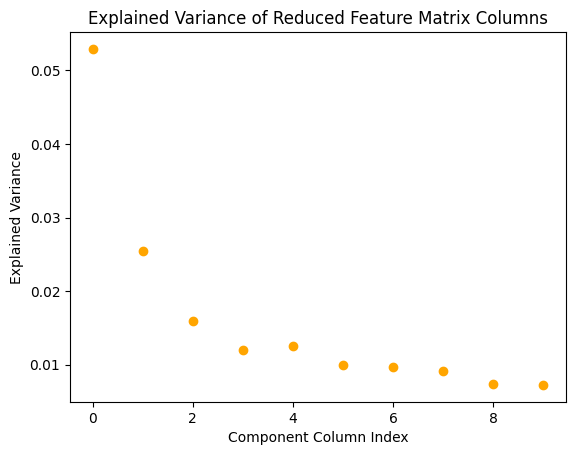

In [15]:
plt.scatter(np.arange(0,10), tsvd.explained_variance_ratio_, c='orange')
plt.xlabel('Component Column Index')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Reduced Feature Matrix Columns')

In [16]:
print(f'explained variance of column 0 = {tsvd.explained_variance_ratio_[0]}')
print(f'explained variance of column 1 = {tsvd.explained_variance_ratio_[1]}')

explained variance of column 0 = 0.052918126700899445
explained variance of column 1 = 0.02548106188479108


We can observe from the scatter plot and output above that the first two components explain the most variance in the data. The component at index 0 explains the most variance, 0.05291812670326833, and the component at index 1 explains the next most variance, 0.02548106177644056.

#### **Visualization**

**Plot the two components with the highest explained variance.**

Text(0.5, 1.0, 'Component 1 v. Component 0')

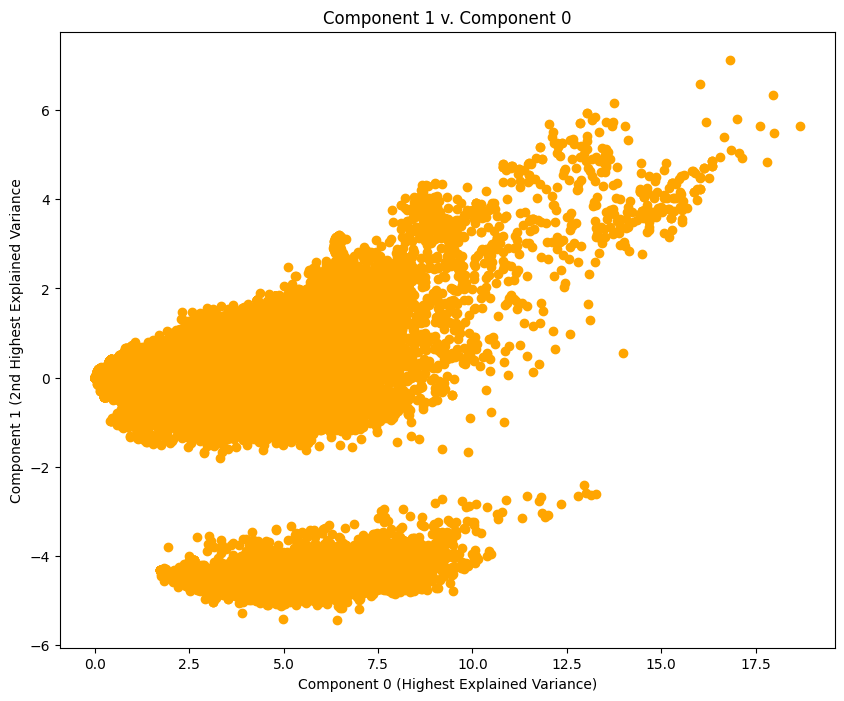

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(reduced_word_matrix[:, 0], reduced_word_matrix[:, 1], c='orange')
plt.xlabel('Component 0 (Highest Explained Variance)')
plt.ylabel('Component 1 (2nd Highest Explained Variance')
plt.title('Component 1 v. Component 0')

**Plot the two components with the highest explained variance and color according to the 'category' of each sample.**

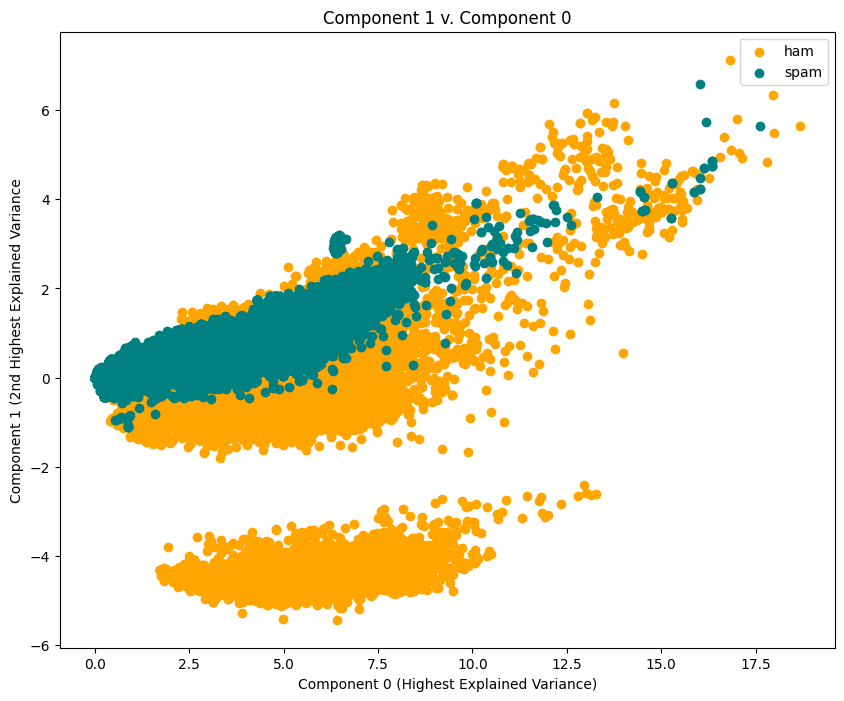

In [18]:
spam_mask = np.where(df['category'] == 'spam')
ham_mask = np.where(df['category'] == 'ham')
plt.figure(figsize=(10,8))
plt.scatter(reduced_word_matrix[ham_mask, 0], reduced_word_matrix[ham_mask, 1], c='orange', label='ham')
plt.scatter(reduced_word_matrix[spam_mask, 0], reduced_word_matrix[spam_mask, 1], c='teal', label='spam')
plt.xlabel('Component 0 (Highest Explained Variance)')
plt.ylabel('Component 1 (2nd Highest Explained Variance')
plt.title('Component 1 v. Component 0')
plt.legend()

#### **Reflection Questions**

**1. Use a text editor to look at one of the JSON files. Describe the JSON file. What are the keys and values of the JSON document? What do you think they correspond to?**

Each of the JSON files represents key-value pairs where the keys correspond to each of the columns of the dataframe. The keys for each of the files is: 'category', 'to_address', 'from_address', 'subject', and 'body'. The value for each of the key-value pairs is a string representing the content of that key from each email; this corresponds to the value of each entry in the corresponding column of the dataframe. 

**2. Assume that 32-bit (4-byte) floating point values are used to store the counts. Calculate the memory usage of a dense matrix with those dimensions.**

The shape of the sparse matrix returned from the CountVectorizer is (63542, 300984). If we pretend this was a dense matrix with the same dimensions where each entry is represented with a 32-bit floating point value, the memory usage can be computed using the equation: 

- dense memory (in bytes) = number of rows $*$ number of columns $ *$ $ 4 $ bytes. 

The calculated memory usage is displayed in the output of the cell below.

In [19]:
dense_mem = 63542 * 300984 * 4
print(f'Memory usage of dense matrix with the dimensions (63542, 3000984) = {dense_mem} bytes')
print(f'In gigabytes (GB) =  {dense_mem / 1000000000} GB')

Memory usage of dense matrix with the dimensions (63542, 3000984) = 76500501312 bytes
In gigabytes (GB) =  76.500501312 GB


**3. The vectorizer returns a sparse matrix in compressed row format (CSR). Assume that the sparse matrix uses one 32-bit (4-byte) floating point number and one 32-bit (4-byte) integer for each nonzero entry and one 32-bit (4-byte) integer for each row. Calculate the memory usage for the sparse matrix.**

The shape of the sparse matrix returned from the CountVectorizer is (63542, 300984) and had 6,885,706 nonzero entries. If each nonzero entry is represented using 8 bytes (one 4-byte floating point number and one 4-byte integer) and each row is represented with 4-bytes (32-bit integer), then the memory usage for the sparse matrix can be calculated using the following equation: 

- sparse memory (in bytes) = (number nonzero entries $*$ $8$ bytes) $+$ (number of rows $*$ $4$ bytes).

The calculated memory usage for the sparse matrix is displayed in the output of the cell below.

In [20]:
sparse_mem_bytes = (6885706 * 8) + (63542 * 4)
print(f'Memory usage of sparse matrix with the dimensions (63542, 3000984) = {sparse_mem_bytes} bytes')
print(f'In gigabytes (GB) =  {sparse_mem_bytes / 1000000000} GB')

Memory usage of sparse matrix with the dimensions (63542, 3000984) = 55339816 bytes
In gigabytes (GB) =  0.055339816 GB


**4. Calculate the sparsity ratio (100 * number of nonzero entries divided by maximum possible entries).**

The shape of the sparse matrix returned from the CountVectorizer is (63542, 300984) and had 6,885,706 nonzero entries. The sparsity ratio is displayed in the output of the cell below.

In [21]:
sparsity_ratio = 6885706 / (63542 * 300984) * 100
print(f'sparisty ratio = {sparsity_ratio}')

sparisty ratio = 0.03600345556909388


**5. Based on your analysis, do you think that the sparse matrix is better suited for this situation? If so, why?**

Based on the calculations in questions 2 - 4, I think that the sparse matrix is better suited for this situation. The hypothetical dense memory was approximately 76.5 GB which is very memory expensive, compared to the hypothetical memory usage of the sparse matrix which was approximately 0.055 GB which is significantly less than the dense matrix. Since the sparse matrix takes up significantly less memory than the dense matrix the sparese matrix is a better choice for this dataset.

**6. What do you notice when looking at the first scatter plot? Why do you think this pattern appears?**

Based on the first scatter plot in the visualization section, I observed that there are two distinct clusters of data points. I think that this pattern might occur because each of these clusters represent the data points in each of the two categories, 'spam' and 'ham'.

**7. In the second plot, how you describe the relationship between the pattern you observe and the ham and spam messages?**

From the second plot, I observed that the bottom cluster is all 'ham' data samples and the upper cluster contains a cluster of 'spam' data samples which is on top of a 'ham' cluster. Therefore, the TruncatedSVD did not produce a perfect division between the classes, but since the two categories are somewhat clustered together the data may be used to train a predictive model, but more exploration and testing of models would be needed.

#### **Conclusion**

In this lab, we used dimensionality reduction to reduce the number of dimensions from the feature matrix of all the words from the 63,542 data samples' body column. The TruncatedSVD function from sklearn was used to reduce the feature matrix from 300,984 features to 10 features. From the results of the dimensionality reduction we were able to find the components that explain the highest amount of variance of the data which when plotted, showed that the projected data produced somewhat distinct groups of samples based on the two categories, 'spam' and 'ham'. Therefore, through dimensionality reduction we were able to transform our data into something that may be useful for training a predictive model. 